# Data visualization and Analysis


## Agenda
## 1. Data preparation
- Merge all .csv files into **df_all_bc** 
- Change "Café" (French) -> Coffee 
- Remove words that does not add value : Restaurant, Joint, Shop

## 2. Data Visualization  
- Top 3 restaurants for each Business Center based on category
- Heatmap of restaurants for each Business Center 
## visualization bonus

In [2]:
# install wordcloud
!pip install wordcloud

import pandas as pd
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [3]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style


## Initialization of variables 

In [4]:

STOPWORDS ={'Restaurant','Place','Joint','Shop','Venue','Category','Diner','Room'}

In [5]:
address=['Grenoble Europole',
          'Saint-Étienne Châteaucreux',
          'Mériadeck',
          'Innopole FR',
          'Noveos FR',
          'Pleyel Saint Denis',
          "Parc Icade de Rungis",
          "Nanterre Champs Pierreux",
          "Les Bruyères Courbevoie",
          'Boulogne Billancourt Rives de Seine',
          'EuroRennes',
          'Val de Fontenay, FR']


## 1. Data Preparation
- Merge all .csv files into **df_all_bc** 
- Change "Café" (French) -> Coffee 
- Remove words that does not add value : Restaurant, Joint, Shop


In [88]:
#BC stands for business centers
df_all_bc=pd.DataFrame()
for bc in address:
    df_temp=pd.DataFrame()
    try:
        df_temp=pd.read_csv('business center venues/venues{}.csv'.format(bc),index_col=0)
        df_temp['Venue Category']=df_temp['Venue Category'].str.replace("Café","Coffee ")

    except OSError as e:
        print(e)
    df_all_bc=pd.concat([df_all_bc,df_temp],sort=False)
    #Removing StopWords like restaurant, diner, Joint from venue category
    for stopwords in STOPWORDS :
        df_all_bc['Venue Category']=df_all_bc['Venue Category'].str.replace(stopwords,"")
df_all_bc=df_all_bc[df_all_bc['Venue Category']!='']
df_all_bc.to_csv("business center venues/allBC.csv",encoding='utf-8')    

In [93]:
df_all_bc.reset_index(inplace=True)

## 1. Data Preparation
- To understand repartition in each Business Center some data preparation to create **with df_bc_cat** and df_heatmap

In [94]:
ionehot = pd.get_dummies(df_all_bc[['Venue Category']], prefix="", prefix_sep="")
ionehot['Business Center'] = df_all_bc['Business Center'] 

# move neighborhood column to the first column
fixed_columns = [ionehot.columns[-1]] + list(ionehot.columns[:-1])
ionehot = ionehot[fixed_columns]

df_bc_cat=ionehot.groupby(['Business Center']).sum().reset_index()
df_heatmap=ionehot.groupby(['Business Center']).sum().reset_index()
df_bc_cat

,Business Center,African,American,Arepa,Argentinian,Asian,Bagel,Bakery,Bar,Belgian,...,Taco,Tapas,Tea,Thai,Theme,Turkish,Vegetarian / Vegan,Vietnamese,Wine Bar,Wings
0,Boulogne Billancourt Rives de Seine,1,2,0,0,2,0,11,1,0,...,0,0,0,2,1,3,0,0,0,0
1,EuroRennes,0,0,0,0,2,1,7,0,0,...,0,0,0,0,1,3,1,0,1,0
2,Grenoble Europole,1,0,0,1,5,1,23,1,0,...,2,0,2,2,0,0,0,8,1,0
3,Innopole FR,0,2,0,0,1,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Les Bruyères Courbevoie,0,0,0,0,2,1,8,0,0,...,0,1,0,0,0,0,1,0,0,1
5,Mériadeck,0,2,0,0,3,4,22,0,0,...,1,0,8,3,0,1,3,2,0,1
6,Nanterre Champs Pierreux,1,0,1,0,2,0,1,2,0,...,0,0,0,0,0,0,0,0,0,1
7,Noveos FR,0,0,0,0,2,0,1,2,0,...,1,0,0,0,0,0,0,0,0,0
8,Parc Icade de Rungis,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,Pleyel Saint Denis,2,0,0,0,2,0,3,0,0,...,0,0,0,0,0,1,0,0,0,0


## 2. Data Visualization
As a basis visualisation in order to understand the composition of our Data:
- WordCloud of all category
- Number of venue by Business Center to see the statistical impact

                                   The word Cloud for All Business Centers merged


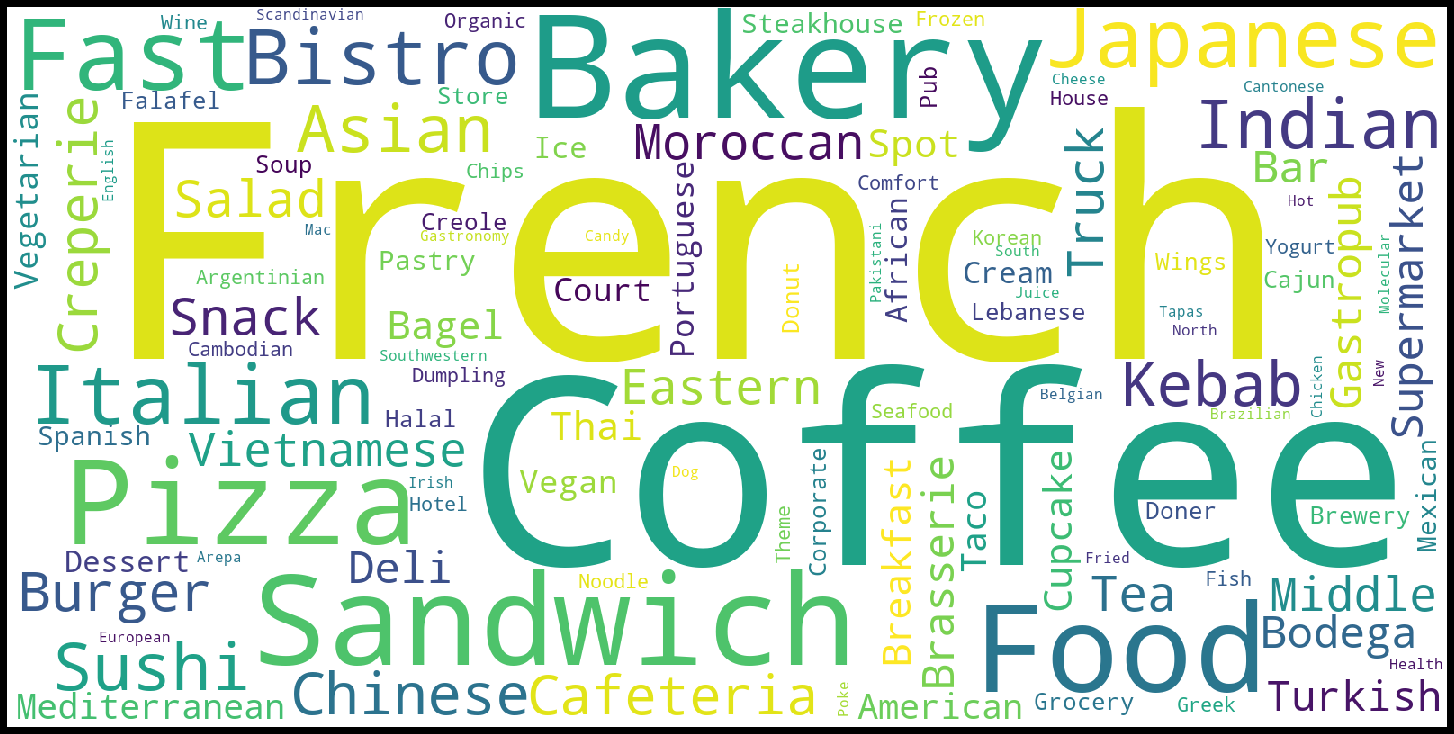

In [95]:
# instantiate a word cloud object
WC= WordCloud(
    background_color='white',
    max_words=2500,
    stopwords=STOPWORDS,
    collocations=False,
    width=1600, height=800
)


df_WC_all=pd.DataFrame(df_all_bc['Venue Category'])
df_WC_all.to_csv('WC/WC_all.txt',header=False,encoding='utf-8', index=False, sep=',')
WC_all = open('WC/WC_all.txt', 'r').read()
# generate the word cloud
WC.generate(WC_all)



plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(WC)
plt.axis("off")
plt.tight_layout(pad=0)
print("                                   The word Cloud for {}".format("All Business Centers merged"))
plt.show()


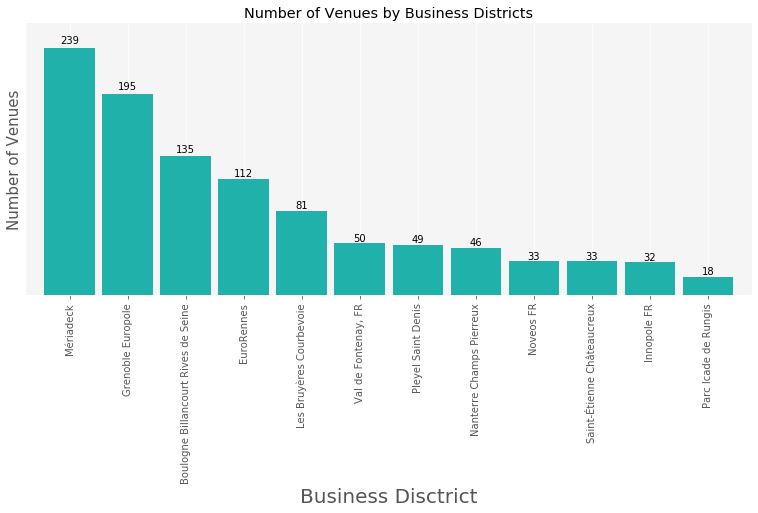

In [96]:

#Nb of venues by Business Districts
venues_count=pd.DataFrame()
venues_count['Business Center'] = df_bc_cat.iloc[:,0]
venues_count['Number of Venues'] = df_bc_cat.iloc[:,1:].sum(axis=1)
venues_count.sort_values(by=['Number of Venues'],ascending=False,inplace=True)
venues_count.reset_index(drop='index')

fig, ax = plt.subplots()
fig.set_size_inches(13,5)
# title
plt.title('Number of Venues by Business Districts')
#On x-axis
plt.xlabel('Business Disctrict', fontsize = 20)
#On y-axis
plt.ylabel('Number of Venues', fontsize=15)

ax.set_facecolor('whitesmoke')
x = venues_count.index.tolist()
y = venues_count['Number of Venues'].tolist()
ticks = np.arange(len(venues_count))
width = 0.5
bars = ax.bar(ticks+width/2, y, 1.75*width, color='lightseagreen')
ax.set_xlim([-width,len(venues_count)])
ax.set_ylim([0,1.1*max(y)])
ax.set_xticks(ticks + width/2)
ax.set_yticks([])
ax.set_xticklabels(["{}".format(m) for m in venues_count['Business Center']], rotation =90, ha="center")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

for b in bars:
    height = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, 1.01*height, '{}'.format(height), ha='center', va='bottom')


plt.show()


## 2. Data Visualization  
- Top 3 restaurants for each Business Center based on category
- Heatmap of restaurants for each Business Center 

In [98]:
num_top_rest = 10

for bc in df_bc_cat['Business Center']:
    print("----"+bc+"----")
    temp = df_bc_cat[df_bc_cat['Business Center'] == bc].T.reset_index()
    temp.columns = ['venue','count']
    temp = temp.iloc[1:]
    temp['count'] = temp['count']
    #temp = temp.round({'freq': 2})
    print(temp.sort_values('count', ascending=False).reset_index(drop=True).head(num_top_rest))
    print('\n')

----Boulogne Billancourt Rives de Seine----
           venue count
0         Bistro    12
1        French     11
2         Bakery    11
3       Italian      9
4         Pizza      8
5      Japanese      8
6  Deli / Bodega     6
7         Salad      5
8        Coffee      5
9      Cafeteria     4


----EuroRennes----
        venue count
0     Coffee     16
1     French     15
2   Sandwich     13
3      Bakery     7
4    Creperie     7
5      Pizza      5
6    Cupcake      4
7  Fast Food      3
8    Turkish      3
9     Burger      2


----Grenoble Europole----
         venue count
0      French     32
1       Bakery    23
2      Coffee     15
3      Indian     12
4    Sandwich     10
5     Italian      9
6       Pizza      9
7  Vietnamese      8
8       Kebab      6
9   Fast Food      6


----Innopole FR----
       venue count
0  Sandwich      6
1    French      3
2   Italian      2
3     Bakery     2
4    Coffee      2
5  American      2
6   Chinese      2
7   Spanish      2
8  Japanes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


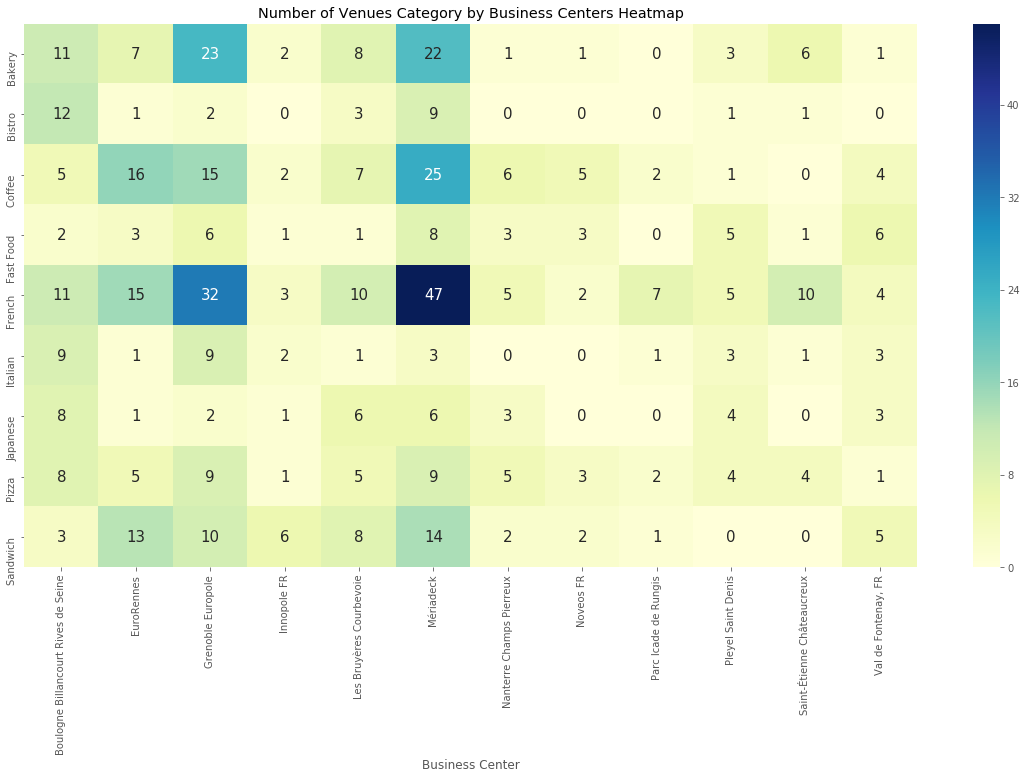

In [100]:
df_heatmap=ionehot.groupby(['Business Center']).sum().reset_index()
df_heatmap.loc['Total by category',:] = df_heatmap.sum(numeric_only=True, axis=0)
df_heatmap.loc[:,'Row_Total'] = df_heatmap.sum(numeric_only=True, axis=1)
#df_heatmap.drop('',axis=1,inplace=True)
to_keep=df_heatmap.iloc[12,:]>25
df_heatmap_processed=df_heatmap.loc[:,to_keep]
df_heatmap_processed['Business Center']=df_heatmap['Business Center']
df_heatmap_processed.set_index('Business Center',inplace=True)
#df_heatmap_processed.sort_values(axis=1)

import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df_heatmap_processed.iloc[:-1,:-1].T,annot=True, fmt=".0f",cmap="YlGnBu",annot_kws={"size": 15})

#workaround for cut-off heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Number of Venues Category by Business Centers Heatmap")

plt.show()

## 3. Data Analysis


In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Business Center']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bc_venues_sorted = pd.DataFrame(columns=columns)
bc_venues_sorted['Business Center'] = df_bc_cat['Business Center']


for ind in range(12):
    bc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_bc_cat.iloc[ind, :], num_top_venues)

bc_venues_sorted.head()

,Business Center,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boulogne Billancourt Rives de Seine,Bistro,Bakery,French,Italian,Japanese,Pizza,Deli / Bodega,Coffee,Salad,Cafeteria
1,EuroRennes,Coffee,French,Sandwich,Bakery,Creperie,Pizza,Cupcake,Fast Food,Turkish,Greek
2,Grenoble Europole,French,Bakery,Coffee,Indian,Sandwich,Italian,Pizza,Vietnamese,Fast Food,Kebab
3,Innopole FR,Sandwich,French,Italian,American,Coffee,Bakery,Chinese,Spanish,Southwestern French,Pizza
4,Les Bruyères Courbevoie,French,Bakery,Sandwich,Coffee,Japanese,Pizza,Supermarket,Bistro,Asian,Sushi


In [108]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

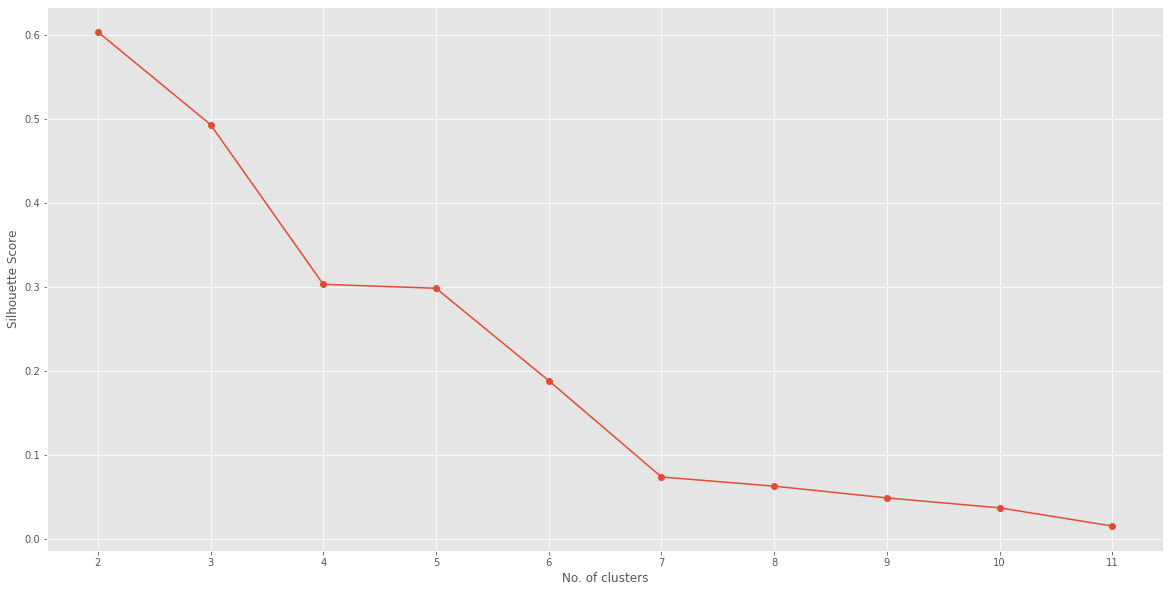

2

In [145]:
bc_clustering_testing =df_bc_cat.drop('Business Center', 1)

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
indices = []
scores = []
max_range = 12

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    lct = bc_clustering_testing
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 16).fit_predict(lct)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(lct, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

plot(max_range, scores, "No. of clusters", "Silhouette Score")

#From the graph the optimal number is found out to be considered for our clustering
opt = np.argmax(scores) + 2 # Finds the optimal value
opt



In [146]:
# set number of clusters
kclusters = opt
bc_grouped_clustering = df_bc_cat.drop('Business Center', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
# add clustering labels
bc_venues_sorted['Cluster Labels']=kmeans.labels_
#bc_venues_sorted.set_index('Business Center',inplace=True)
bc_venues_sorted

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Business Center,,,,,,,,,,,
Boulogne Billancourt Rives de Seine,1,Bistro,Bakery,French,Italian,Japanese,Pizza,Deli / Bodega,Coffee,Salad,Cafeteria
EuroRennes,1,Coffee,French,Sandwich,Bakery,Creperie,Pizza,Cupcake,Fast Food,Turkish,Greek
Grenoble Europole,0,French,Bakery,Coffee,Indian,Sandwich,Italian,Pizza,Vietnamese,Fast Food,Kebab
Innopole FR,1,Sandwich,French,Italian,American,Coffee,Bakery,Chinese,Spanish,Southwestern French,Pizza
Les Bruyères Courbevoie,1,French,Bakery,Sandwich,Coffee,Japanese,Pizza,Supermarket,Bistro,Asian,Sushi
Mériadeck,0,French,Coffee,Bakery,Sandwich,Bistro,Pizza,Tea,Fast Food,Japanese,Burger
Nanterre Champs Pierreux,1,Coffee,Pizza,French,Fast Food,Japanese,Food Truck,Portuguese,Asian,Bar,Sandwich
Noveos FR,1,Coffee,Pizza,Fast Food,Halal,Brasserie,Sandwich,Bar,Sushi,Asian,French
Parc Icade de Rungis,1,French,Pizza,Coffee,Food Truck,Tea,Italian,Portuguese,Sandwich,Middle Eastern,Burger


In [147]:
cluster0=bc_venues_sorted[bc_venues_sorted['Cluster Labels']==0]
cluster0

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Business Center,,,,,,,,,,,
Grenoble Europole,0,French,Bakery,Coffee,Indian,Sandwich,Italian,Pizza,Vietnamese,Fast Food,Kebab
Mériadeck,0,French,Coffee,Bakery,Sandwich,Bistro,Pizza,Tea,Fast Food,Japanese,Burger


In [148]:
cluster1=bc_venues_sorted[bc_venues_sorted['Cluster Labels']==1]
cluster1

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Business Center,,,,,,,,,,,
Boulogne Billancourt Rives de Seine,1,Bistro,Bakery,French,Italian,Japanese,Pizza,Deli / Bodega,Coffee,Salad,Cafeteria
EuroRennes,1,Coffee,French,Sandwich,Bakery,Creperie,Pizza,Cupcake,Fast Food,Turkish,Greek
Innopole FR,1,Sandwich,French,Italian,American,Coffee,Bakery,Chinese,Spanish,Southwestern French,Pizza
Les Bruyères Courbevoie,1,French,Bakery,Sandwich,Coffee,Japanese,Pizza,Supermarket,Bistro,Asian,Sushi
Nanterre Champs Pierreux,1,Coffee,Pizza,French,Fast Food,Japanese,Food Truck,Portuguese,Asian,Bar,Sandwich
Noveos FR,1,Coffee,Pizza,Fast Food,Halal,Brasserie,Sandwich,Bar,Sushi,Asian,French
Parc Icade de Rungis,1,French,Pizza,Coffee,Food Truck,Tea,Italian,Portuguese,Sandwich,Middle Eastern,Burger
Pleyel Saint Denis,1,French,Fast Food,Japanese,Pizza,Bakery,Food Truck,Italian,Sushi,Mediterranean,African
Saint-Étienne Châteaucreux,1,French,Bakery,Pizza,Gastropub,Snack,Bistro,Italian,Fast Food,Falafel,Chinese


In [149]:
#cluster2=bc_venues_sorted[bc_venues_sorted['Cluster Labels']==2]
#cluster2

# Conclusion
From what we see, the impact of number of venues by business center seems to be a bias for differentiating the two clusters. 
More Business Centers have to be analysed to see if the clustering is correct. Looking this time at the amount of venues rather than the size of the Business Center.

Even tought we need more information to conclude, we can still use the data to express the fact that the repartition of Val de Fontenay is lacking restaurant for example French.


# Bonus

### Wordcloud for all Business Centers 


In [162]:
df_all_bc2=pd.read_csv("business center venues/allBC.csv")
#print(df_all_bc)
df_list={}
for BC in address:
    df_list[BC]=df_all_bc2[df_all_bc2['Business Center']==BC]['Venue Category']
    #print(df_list[BC])
WC_list={}
for x in range(len(address)):
    df_WC=pd.DataFrame(df_list[address[x]])
    df_WC.to_csv('WC/WC_list_{}.txt'.format(x),header=False,encoding='utf-8', index=False, sep=',')
    WC_list[x] = open('WC/WC_list_{}.txt'.format(x), 'r').read()
    

The word Cloud for Grenoble Europole


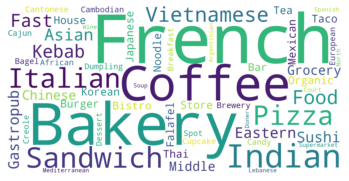

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Saint-Étienne Châteaucreux


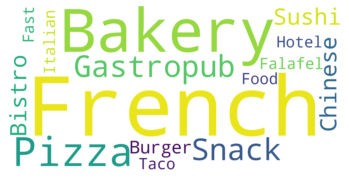

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Mériadeck


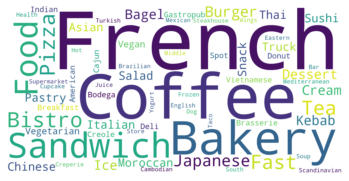

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Innopole FR


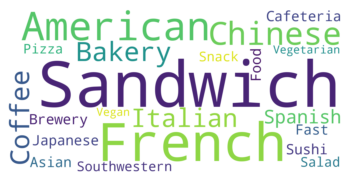

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Noveos FR


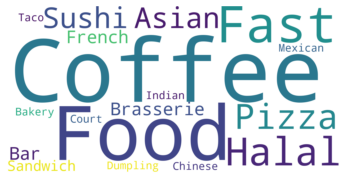

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Pleyel Saint Denis


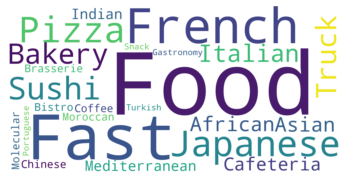

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Parc Icade de Rungis


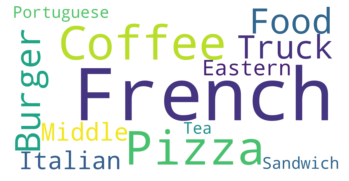

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Nanterre Champs Pierreux


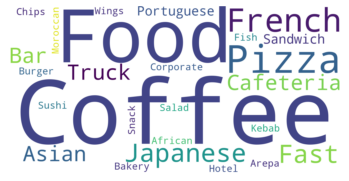

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Les Bruyères Courbevoie


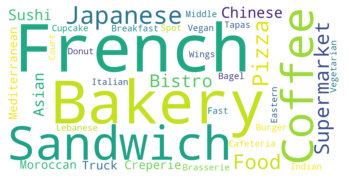

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Boulogne Billancourt Rives de Seine


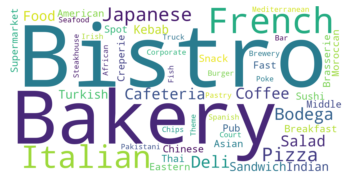

<Figure size 2160x3240 with 0 Axes>

The word Cloud for EuroRennes


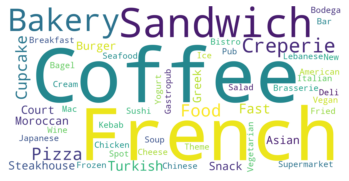

<Figure size 2160x3240 with 0 Axes>

The word Cloud for Val de Fontenay, FR


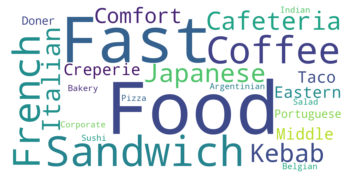

<Figure size 2160x3240 with 0 Axes>

In [160]:
for x in range(len(address)):
    # generate the word cloud
    WC.generate(WC_list[x])
    # display the word cloud\n",
    plt.imshow(WC, interpolation='bilinear')
    plt.axis('off')

    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(45)

    print("The word Cloud for {}".format(address[x]))
    plt.show()